In [1]:
import random
import math as Math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

Вспомогательные функции:

In [2]:
def sgn(value : float):
    return Math.copysign(1.0, value)

def random_range(_min : float, _max : float):
    return _min + random.random() * (_max - _min)

Класс для отслеживания траектории численных методов в поиске состояния равновесия:

In [3]:
class Tracker:
    def __init__(self):
        self.path = []
        self.delta = []
        self.messages = []

    def trace(self, x : float, y : float):
        
        if self.path:
            _x, _y = self.path[-1]
            self.delta.append( (abs(_x - x), abs(_y - y)) )

        self.path.append((x,y))
        
    def message(self, text : str):
        self.messages.append(text)
        
    def xdelta(self):
        return [point[0] for point in self.delta]

    def ydelta(self):
        return [point[1] for point in self.delta]

    def xpath(self):
        return [point[0] for point in self.path]

    def ypath(self):
        return [point[1] for point in self.path]

    def answer(self):
        return self.path[-1]

    def reset(self):
        self.path.clear()

Объявление функции f(x):

In [4]:
def f(x : float, alpha : float = 5, c_hill : float = 2):
    return x ** (c_hill + 1) + x - alpha

И её производной f'(x):

In [5]:
def f_(x : float, alpha : float = 5, c_hill : float = 2):
    return (c_hill + 1) * x ** c_hill + 1 

Далее будут представлены методы для поиска состояния равновесия. В качестве результата функция возвращает траекторию поиска.

Метод бисекции:

In [6]:
def bisection(func, x_left : float, x_right : float, epsilon_x : float = 1e-10, epsilon_y : float = 1e-7):
    assert(x_right > x_left)
    assert(epsilon_x < 1e-1)
    assert(epsilon_y < 1e-1)

    recorder = Tracker()

    x = x_left

    while x_right - x_left > epsilon_x:

        x = (x_right + x_left) / 2
        y = func(x)
        
        recorder.trace(x, y)

        if (abs(y) <= epsilon_y):
            return recorder;
        elif (sgn(func(x)) != sgn(func(x_left))):
            x_right = x
        else:
            x_left = x
    
    recorder.message('out of operation limit')
    
    return recorder

Метод Ньютона:

In [7]:
def newton(func, func_, x0 : float, epsilon_x : float = 1e-10, epsilon_y : float = 1e-7, opslimit : int = 1000):
    assert(epsilon_x < 1e-1)
    assert(epsilon_y < 1e-1)

    recorder = Tracker()

    x = x0
    y = func(x)

    slope = y / func_(x)

    while abs(slope) > epsilon_x or y > epsilon_y:
        if opslimit == 0:
            recorder.message('out of operation limit')
            break;
            
        opslimit = opslimit - 1
        
        recorder.trace(x, y)

        x = x - slope
        y = func(x)

        slope = y / func_(x)

    recorder.trace(x, y)

    return recorder

График функции с коэффициентами по-умолчанию: $\alpha$ = 5, n = 2

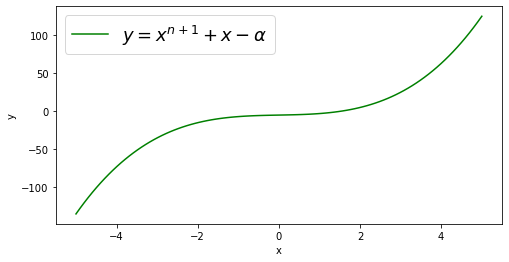

In [8]:
x = np.linspace(-5,5,100)
y = f(x)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y, 'g', label=r'$y = x^{n+1} + x - \alpha$')
ax.set(xlabel='x', ylabel='y')
ax.legend(prop={'size': 18})
pass

Достигнуто значение  3.800588821434303e-08  в точке  1.5159802325069904


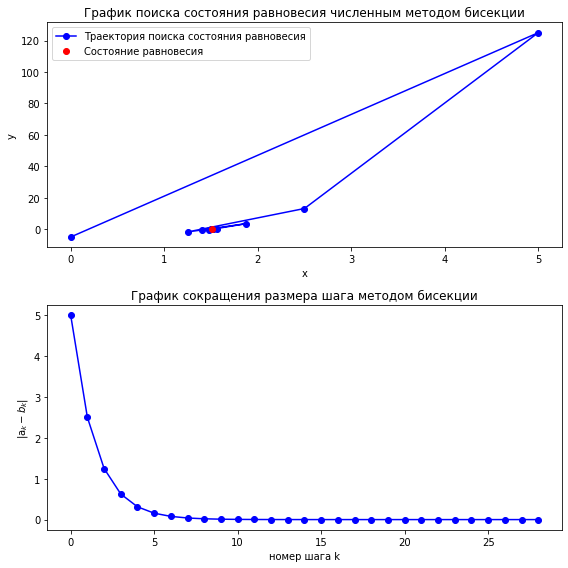

In [9]:
result = bisection(f, -10, 10)
xpath  = result.xpath()
ypath  = result.ypath()
x, y   = result.answer()
xdelta = result.xdelta()
ydelta = result.ydelta()

fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(xpath, ypath, '-bo', label='Траектория поиска состояния равновесия')
ax[0].plot(x, y, 'ro', label='Состояние равновесия')
ax[0].set(title='График поиска состояния равновесия численным методом бисекции', xlabel='x', ylabel='y')

ax[0].legend()

ax[1].plot(xdelta, '-bo')
ax[1].set(title='График сокращения размера шага методом бисекции', xlabel='номер шага k', ylabel='|a$_{k} - b_{k}$|')

fig.tight_layout()

print('Достигнуто значение ', y, ' в точке ', x)
pass


Достигнуто значение  3.375077994860476e-14  в точке  1.515980227692825


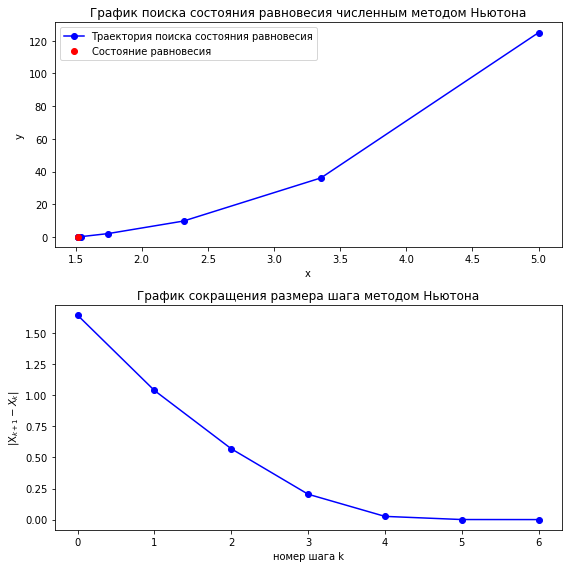

In [10]:
result = newton(f, f_, 5)
xpath  = result.xpath()
ypath  = result.ypath()
x, y   = result.answer()
xdelta = result.xdelta()
ydelta = result.ydelta()

fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(xpath, ypath, '-bo', label='Траектория поиска состояния равновесия')
ax[0].plot(x, y, 'ro', label='Состояние равновесия')
ax[0].set(title='График поиска состояния равновесия численным методом Ньютона', xlabel='x', ylabel='y')

ax[0].legend()

ax[1].plot(xdelta, '-bo')
ax[1].set(title='График сокращения размера шага методом Ньютона', xlabel='номер шага k', ylabel='|X$_{k+1} - X_{k}$|')

fig.tight_layout()

print('Достигнуто значение ', y, ' в точке ', x)
pass

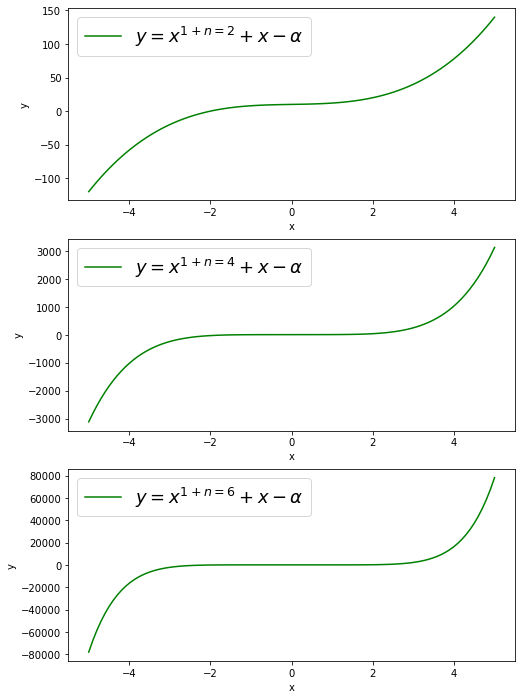

In [11]:
f_n_2 = lambda x : f(x, -10, 2)
f_n_4 = lambda x : f(x, -10, 4)
f_n_6 = lambda x : f(x, -10, 6)

x = np.linspace(-5,5,100)

fig, ax = plt.subplots(3, figsize=(8, 12))
ax[0].plot(x, f_n_2(x), 'g', label=r'$y = x^{1 + n=2} + x - \alpha$')
ax[0].set(xlabel='x', ylabel='y')
ax[0].legend(prop={'size': 18})

ax[1].plot(x, f_n_4(x), 'g', label=r'$y = x^{1 + n=4} + x - \alpha$')
ax[1].set(xlabel='x', ylabel='y')
ax[1].legend(prop={'size': 18})

ax[2].plot(x, f_n_6(x), 'g', label=r'$y = x^{1 + n=6} + x - \alpha$')
ax[2].set(xlabel='x', ylabel='y')
ax[2].legend(prop={'size': 18})
pass

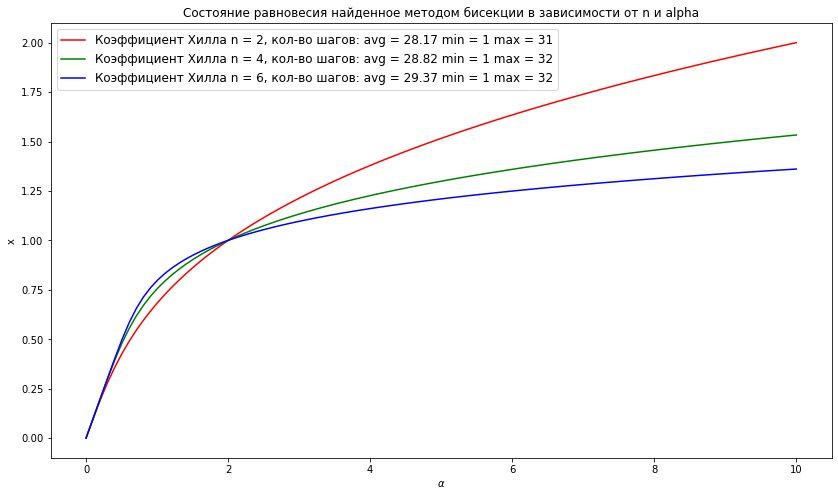

In [12]:
fig, ax = plt.subplots(figsize=(14, 8))

nprop = [('-r', 2), ('-g', 4), ('-b', 6)]

axis_alpha = np.linspace(0, 10, 100)

for prop in nprop:
    xresult = []
    outs = []
    avg = 0;
    vmax = 0;
    vmin = 10000;
    col, n = prop
    for alpha in axis_alpha:
        result = bisection(lambda x : f(x, alpha, n), -10, 10)
        x, y   = result.answer()
        ticks  = len(result.path)
        avg   += ticks
        vmin   = min(vmin, ticks)
        vmax   = max(vmax, ticks)
        
        xresult.append(x)
        
    ax.plot(axis_alpha, xresult, col, label='Коэффициент Хилла n = ' + str(n) + ','
            + ' кол-во шагов: avg = ' + str(avg / len(axis_alpha))
            + ' min = ' + str(vmin)
            + ' max = ' + str(vmax));

ax.set(title='Состояние равновесия найденное методом бисекции в зависимости от n и alpha', xlabel=r'$\alpha$', ylabel='x')
ax.legend(prop={'size': 12})

pass

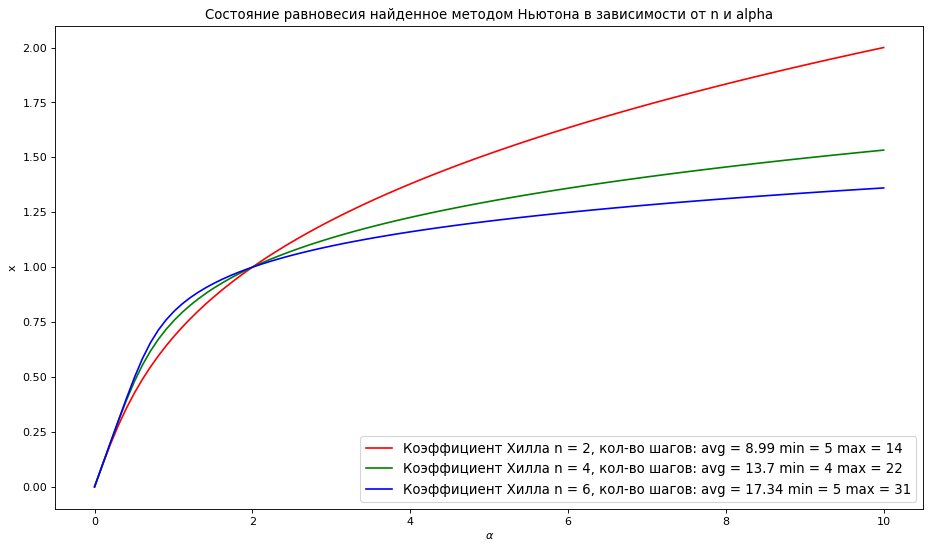

In [13]:
fig, ax = plt.subplots(figsize=(14, 8), dpi=80)

nprop = [('-r', 2), ('-g', 4), ('-b', 6)]

axis_alpha = np.linspace(0, 10, 100)

for prop in nprop:
    xresult = []
    outs = []
    avg = 0;
    vmax = 0;
    vmin = 10000;
    col, n = prop
    for alpha in axis_alpha:
        result = newton(lambda x : f(x, alpha, n), lambda x : f_(x, alpha, n), random_range(-10, 10))
        x, y   = result.answer()
        ticks  = len(result.path)
        avg   += ticks
        vmin   = min(vmin, ticks)
        vmax   = max(vmax, ticks)
        
        xresult.append(x)
        
    ax.plot(axis_alpha, xresult, col, label='Коэффициент Хилла n = ' + str(n) + ',' 
            + ' кол-во шагов: avg = ' + str(avg / len(axis_alpha))
            + ' min = ' + str(vmin)
            + ' max = ' + str(vmax));

ax.set(title='Состояние равновесия найденное методом Ньютона в зависимости от n и alpha', xlabel=r'$\alpha$', ylabel='x')
ax.legend(prop={'size': 12}, loc='lower right')

pass

Исследование устойчивости состояний системы

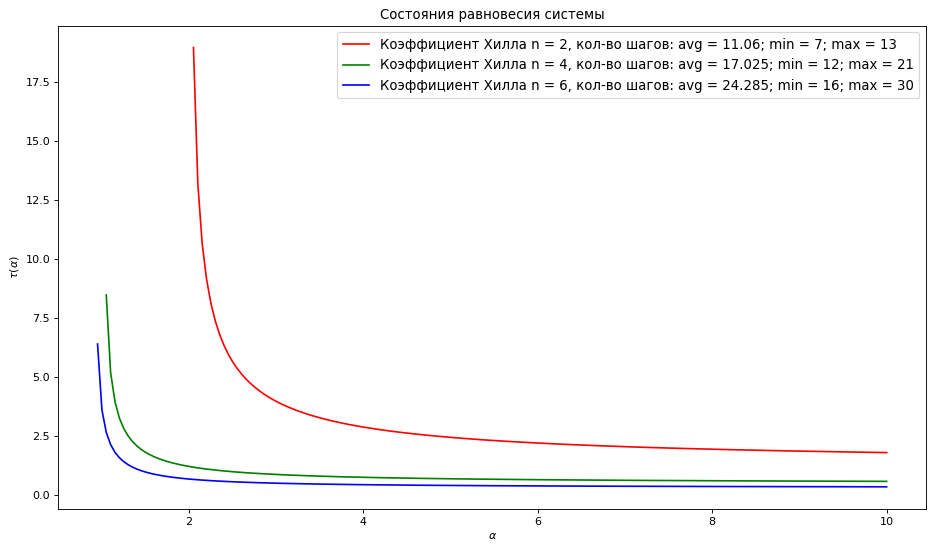

In [14]:
fig, ax = plt.subplots(figsize=(14, 8), dpi=80)

x0 = random_range(-10, 10)
nprop = [('-r', 2), ('-g', 4), ('-b', 6)]

h = 0.05
axis_alpha = np.linspace(h, 10, int((10 - 0) / h))

for col, n in nprop:
    
    vtau = []
    valpha = []
    
    avg = 0;
    vmax = 0;
    vmin = 10000;
    
    for alpha in axis_alpha:

        result = newton(lambda x : f(x, alpha, n), lambda x : f_(x, alpha, n), x0)
        
        x, y   = result.answer()
        ticks  = len(result.path)
        avg   += ticks
        vmin   = min(vmin, ticks)
        vmax   = max(vmax, ticks)
        
        s = (alpha * n * x ** (n - 1)) / (1.0 + x ** n) ** 2
        
        if s**2 > 1.0:
            tau = (1.0 / Math.sqrt(s ** 2 - 1.0)) * Math.acos(-1.0 / s)
            
            vtau.append(tau)
            valpha.append(alpha)
            
    ax.plot(valpha, vtau, col, label='Коэффициент Хилла n = ' + str(n) + ',' 
            + ' кол-во шагов: avg = ' + str(avg / len(axis_alpha))
            + '; min = ' + str(vmin)
            + '; max = ' + str(vmax));

    
ax.set(title='Состояния равновесия системы', xlabel=r'$\alpha$', ylabel=r'$\tau$($\alpha$)')
ax.legend(prop={'size': 12}, loc='upper right')

plt.show()